Análise exploratória dos dados

# 1. Descrição dos dados

## 1.1 Configurações Iniciais

In [26]:
#Importando as bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from google.colab import files

In [27]:
colors = ["#990000", "#48734f"]
sns.set_theme(style="whitegrid")
sns.set_palette(sns.color_palette(colors))

## 1.2 Dicionário de Dados

In [28]:
data_path = ('https://raw.githubusercontent.com/lrodriguesg/bike-bytes/master/data/external/dicionario.csv')
df_dict = pd.read_csv(data_path, sep=',') #Obtendo o dataset

df_dict

,variavel,significado,tipo,subtipo
0,instant,Índice de cada registro,Quantitativa,Discreta
1,dteday,Data,Quantitativa,Data
2,season,"Estação do ano (1:inverno, 2:primavera, 3:verã...",Qualitativa,Nominal
3,yr,"Ano em que ocorreu a locação (0: 2011, 1: 2012)",Quantitativa,Discreta
4,mnth,Mês,Qualitativa,Ordinal
5,holiday,"Indica se era ou não feriado (0: não, 1: sim)",Qualitativa,Nominal
6,weekday,Dia da semana,Qualitativa,Ordinal
7,workingday,"Indica se é dia útil ou não (0: não, 1: sim)",Qualitativa,Nominal
8,weathersit,"Condição climática (1: Limpo, 2: Nublado, 3: L...",Qualitativa,Ordinal
9,temp,Temperatura normalizada em Celsius(min = -8 gr...,Quantitativa,Contínua


## 1.3 Conjunto de dados

In [29]:
df = pd.read_csv(r'https://raw.githubusercontent.com/lrodriguesg/bike-bytes/master/data/raw/data.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [30]:
df.shape

(731, 16)



**Resumo Estatístico**

In [31]:
df[['temp', 'atemp', 'windspeed', 'casual', 'registered','cnt']].describe()

,temp,atemp,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.190486,848.176471,3656.172367,4504.348837
std,0.183051,0.162961,0.077498,686.622488,1560.256377,1937.211452
min,0.059130,0.079070,0.022392,2.000000,20.000000,22.000000
25%,0.337083,0.337842,0.134950,315.500000,2497.000000,3152.000000
50%,0.498333,0.486733,0.180975,713.000000,3662.000000,4548.000000
75%,0.655417,0.608602,0.233214,1096.000000,4776.500000,5956.000000
max,0.861667,0.840896,0.507463,3410.000000,6946.000000,8714.000000


In [32]:
info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


## 1.4 Dados Faltantes

Na análise anterior é possível observar que cada coluna também tem 731 entradas não nulas, isso indica que não há dados nulos em nenhuma das colunas do DataFrame.

In [33]:
#Fazendo verificação de nulos ultilizando o dicionário
checagem_de_nulos = {
    'variavel': df_dict['variavel'],
    'Has Null': []
}

for index, row in df_dict.iterrows():
    checagem_de_nulos['Has Null'].append(df[row['variavel']].isnull().any())

df_checagem_de_nulos = pd.DataFrame.from_dict(checagem_de_nulos)
df_checagem_de_nulos

,variavel,Has Null
0,instant,False
1,dteday,False
2,season,False
3,yr,False
4,mnth,False
5,holiday,False
6,weekday,False
7,workingday,False
8,weathersit,False
9,temp,False


# 1.5 Clone e Mapeamento dos dados

Apesar de os dados já estarem descritos no dicionário, para facilitar a vizualização, foi feita uma cópia e o mapeamento dos dados nessa cópia

In [34]:
df2 = df.copy()

In [35]:
df2['season'] = df['season'].replace({1: 'winter', 2: 'spring', 3: 'summer', 4: 'fall'})
df2['yr'] = df2['yr'].replace({0: 2011, 1: 2012})
df2['holiday'] = df2['holiday'].replace({0: 'no', 1: 'yes'})
df2['weekday'] = df2['weekday'].replace({0: 'Sunday', 1:'Monday', 2: 'Tuesday',
                                         3: 'Wednesday', 4: 'Thursday', 5: 'Friday',
                                         6: 'Saturday'})
df2['workingday'] = df2['workingday'].replace({0: 'no', 1: 'yes'})
df2['weathersit'] = df['weathersit'].replace({1: 'Clear/Few clouds', 2: 'Cloudy', 3:'Light Snow/Light Rain', 4: 'Heavy Rain/Ice Pallets/Heavy Snow'})

In [36]:
# 1. passando o df2 para csv
df2.to_csv('df2.csv', index=False)

# 2.0 Perguntas de partida


Visualizando os dados podemos gerar e reponder algumas perguntas norteadoras:



*   Quantos alugueis no total em cada ano ?
*   Qual o impacto dos feriados e finais de semana na locação das bikes ?
*   Qual epoca do ano é a mais movimentada ?
*   Qual variável mais influencia nos alugueis ?
*   Qual a influencia da temperatura e da sensação termica na locação de bicicletas ?
*   Quais dias da semana com mais locações ?






# 3.0 Insights

## 3.1 Quantidades de alugueis totais por ano

In [38]:
alugueis_ano = df2.groupby('yr')['cnt'].sum().reset_index()
alugueis_ano

,yr,cnt
0,2011,1243103
1,2012,2049576


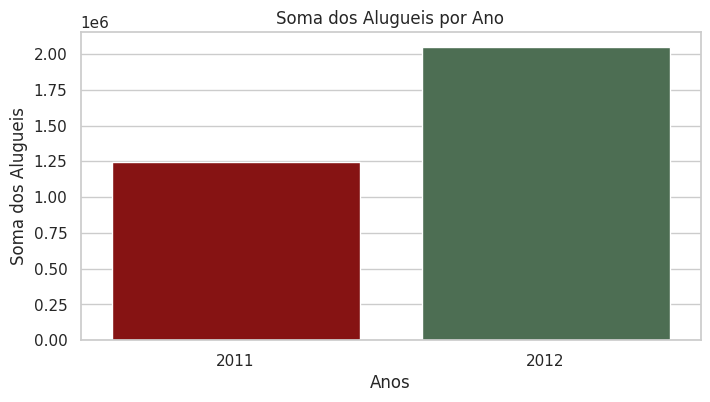

In [39]:
# Criando o grafico de barras.
plt.figure(figsize=(8, 4))
ax = sns.barplot(x='yr', y='cnt', data=alugueis_ano, palette=colors)


# Adicionando rótulos aos eixos e um título ao gráfico
plt.xlabel('Anos')
plt.ylabel('Soma dos Alugueis')
plt.title('Soma dos Alugueis por Ano')

# Substituindo os rótulos no eixo y
ax.set_xticklabels(['2011', '2012'])


plt.show()

Com isso podemos observar que o ano de 2012 teve quase o dobro de alugueis de bikes comparado com o ano de 2011.


## 3.2 Alugueis por feriado/final de semana

In [40]:
# Calculando a proporção
alugueis_feriados = df2.groupby('workingday')['cnt'].sum().reset_index()
alugueis_feriados_p = df2['workingday'].value_counts(normalize=True).reset_index()
alugueis_feriados_p.columns = ['workingday', 'Ratio']

# Merge dos DataFrames
alugueis_feriados = pd.merge(alugueis_feriados, alugueis_feriados_p, on='workingday')
alugueis_feriados.rename(columns={'cnt': 'Total'}, inplace=True)

alugueis_feriados


,workingday,Total,Ratio
0,no,1000269,0.316005
1,yes,2292410,0.683995


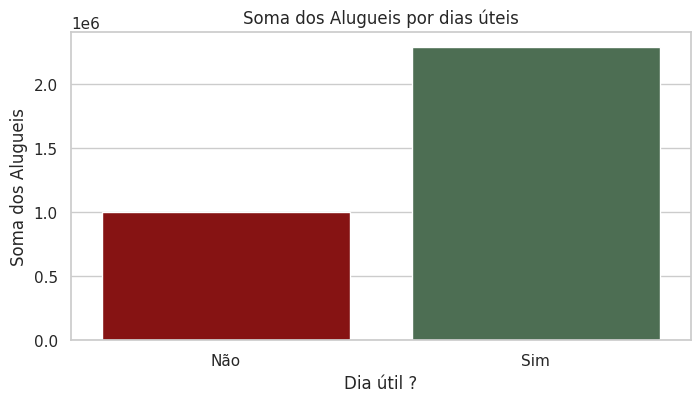

In [41]:
# Criando o grafico de barras.
plt.figure(figsize=(8, 4))
ax = sns.barplot(x='workingday', y='Total', data=alugueis_feriados, palette=colors)


# Adicionando rótulos aos eixos e um título ao gráfico
plt.xlabel('Dia útil ?')
plt.ylabel('Soma dos Alugueis')
plt.title('Soma dos Alugueis por dias úteis')

# Substituindo os rótulos no eixo y
ax.set_xticklabels(['Não', 'Sim'])



plt.show()

Com isso podemos observar que nos dias úteis a movimentação dos alugueis é bem maior.


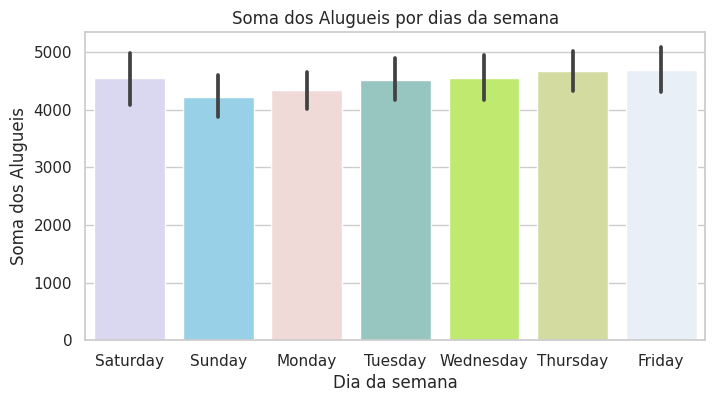

In [42]:
#Grafico dia da semana
PALLETE =  {
    'Saturday': '#d7d3f4',
    'Sunday': '#8bd7f4',
    'Monday': '#f4d7d3',
    'Tuesday': '#90ccc6',
    'Wednesday': '#c5ff5a',
    'Thursday': '#dbe596',
    'Friday': '#e7eff9',
    }
plt.figure(figsize=(8, 4))
ax = sns.barplot(x='weekday', y='cnt', data=df2, palette= PALLETE)


# Adicionando rótulos aos eixos e um título ao gráfico
plt.xlabel('Dia da semana')
plt.ylabel('Soma dos Alugueis')
plt.title('Soma dos Alugueis por dias da semana')




plt.show()

## 3.3 Comparando estações do ano

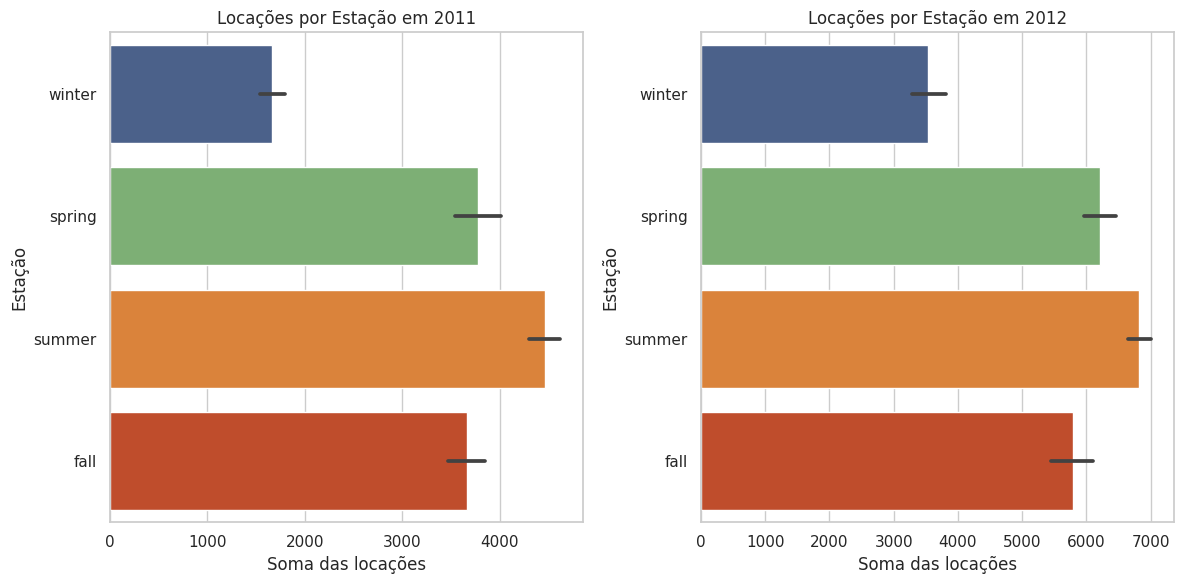

In [43]:
PALLETE =  {
    'winter': '#405e95',
    'spring': '#76b96b',
    'summer': '#f58020',
    'fall': '#d74014'
    }

# Criando uma figura com dois subplots (um ao lado do outro)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Filtrando os dados para 2011 e 2012
dados_2011 = df2[df2['yr'] == 2011]
dados_2012 = df2[df2['yr'] == 2012]

# Criando gráficos de barras para 2011 e 2012
sns.barplot(x='cnt', y='season', data=dados_2011, ax=ax1, palette=PALLETE)
ax1.set_xlabel('Soma das locações')
ax1.set_ylabel('Estação')
ax1.set_title('Locações por Estação em 2011')

sns.barplot(x='cnt', y='season', data=dados_2012, ax=ax2, palette=PALLETE)
ax2.set_xlabel('Soma das locações')
ax2.set_ylabel('Estação')
ax2.set_title('Locações por Estação em 2012')

# Ajustando o espaçamento entre os subplots
plt.tight_layout()


plt.show()

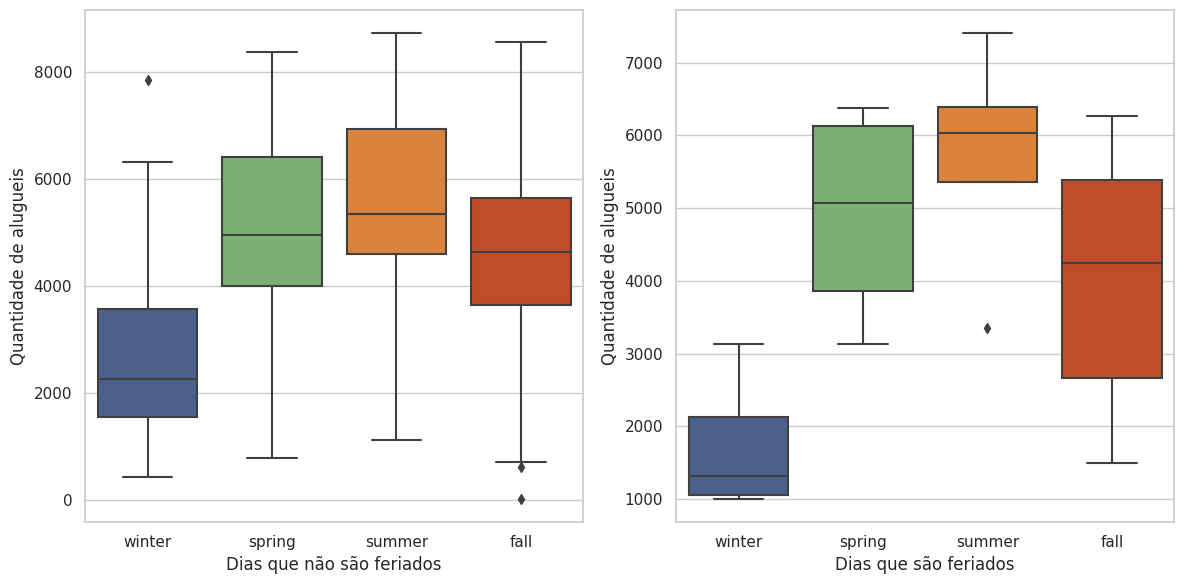

In [44]:
PALLETE =  {
    'winter': '#405e95',
    'spring': '#76b96b',
    'summer': '#f58020',
    'fall': '#d74014'
    }
# Criando uma figura com dois subplots (um ao lado do outro)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
# Filtrando os dados para 2011 e 2012
dados_semferiado = df2[df2['holiday'] == 'no']
dados_comferiado = df2[df2['holiday'] == 'yes']

#Criando gráficos boxplot para com feriado e sem feriado
ax = sns.boxplot(x='season', y='cnt', data=dados_semferiado, ax=ax1, palette=PALLETE)
ax1.set_xlabel('Dias que não são feriados')
ax1.set_ylabel('Quantidade de alugueis')
ax = sns.boxplot(x='season', y='cnt', data=dados_comferiado, ax=ax2, palette=PALLETE)
ax2.set_xlabel('Dias que são feriados')
ax2.set_ylabel('Quantidade de alugueis')
# Ajustando o espaçamento entre os subplots
plt.tight_layout()

Podemos observar que o verão possui mais alugueis nos anos analisados

## 3.4 Gráfico de correlação

In [45]:
#Escolhendo colunas para normalizar.
df_normalizar = df.drop(axis=1, labels=['instant', 'dteday'])

# Aplicando a normalização z-score apenas às colunas selecionadas
df_normalizar = ((df_normalizar - df_normalizar.mean()) / df_normalizar.std()) * -1

df_normalizar

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.347291,1.000684,1.599066,0.171863,-1.497783,1.470218,-1.109667,0.826097,0.679481,-1.249316,0.387626,0.753218,1.924153,1.816709
1,1.347291,1.000684,1.599066,0.171863,1.495054,1.470218,-1.109667,0.720601,0.740146,-0.478785,-0.749089,1.044499,1.913899,1.911691
2,1.347291,1.000684,1.599066,0.171863,0.996248,-0.679241,0.725551,1.633538,1.748570,1.338358,-0.746121,1.060519,1.555624,1.628810
3,1.347291,1.000684,1.599066,0.171863,0.497441,-0.679241,0.725551,1.613675,1.609168,0.263001,0.389562,1.077996,1.411417,1.518858
4,1.347291,1.000684,1.599066,0.171863,-0.001365,-0.679241,0.725551,1.466410,1.503941,1.340576,0.046275,1.115863,1.370398,1.499242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1.347291,-0.997950,-1.587573,0.171863,-0.500171,-0.679241,-1.109667,1.317763,1.520067,-0.175687,-2.060015,0.875556,1.146717,1.233912
727,1.347291,-0.997950,-1.587573,0.171863,-0.998977,-0.679241,-1.109667,1.322319,1.345768,0.266056,0.451822,0.297364,0.772419,0.727514
728,1.347291,-0.997950,-1.587573,0.171863,-1.497783,1.470218,-1.109667,1.322319,1.423370,-0.877791,0.852968,1.003720,1.585747,1.632939
729,1.347291,-0.997950,-1.587573,0.171863,1.495054,1.470218,0.725551,1.308661,1.489029,1.014969,-2.068028,0.705157,1.425517,1.398066


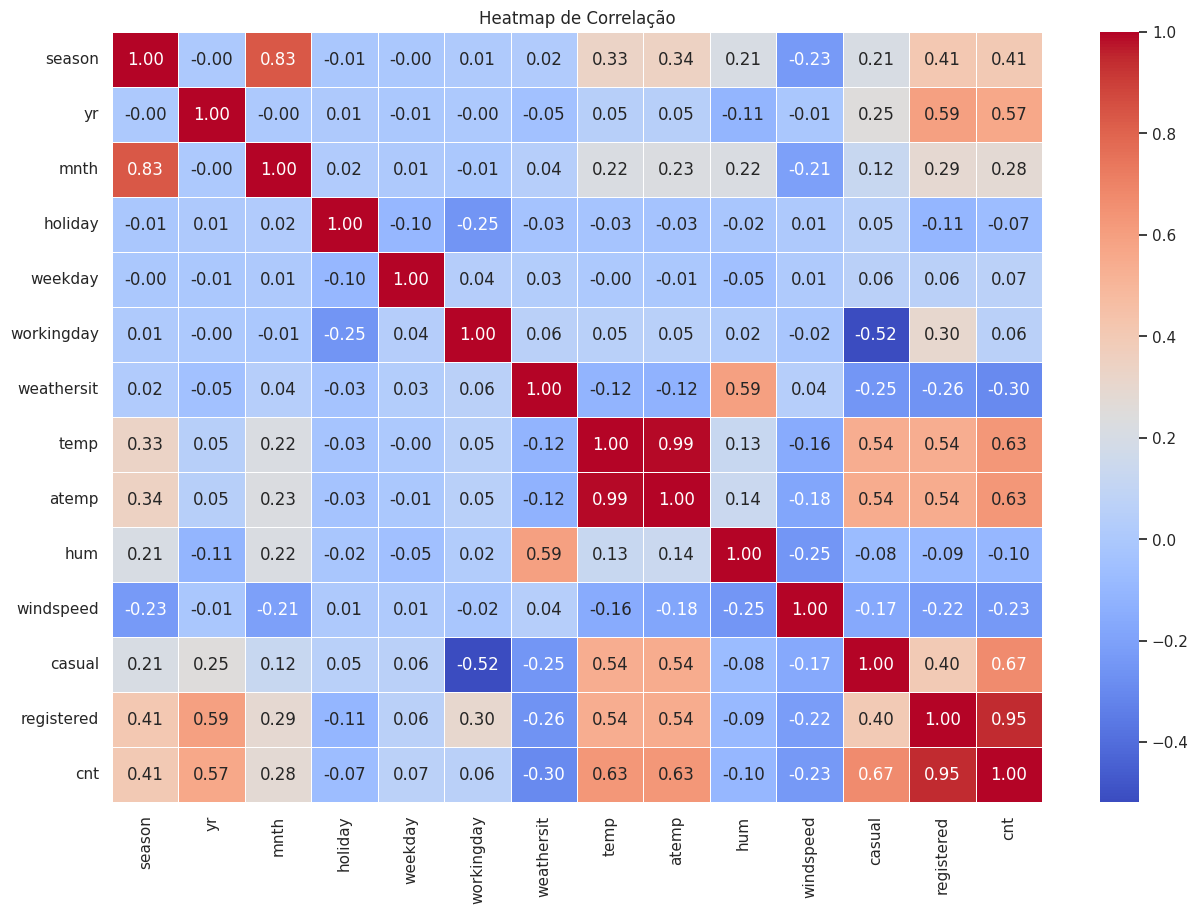

In [46]:
correlacao = df_normalizar.corr()



# Criando um heatmap da matriz de correlação
plt.figure(figsize=(15, 10))
sns.heatmap(correlacao, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap de Correlação")
plt.show()

## 3.5 Influencia da temperatura e da sensação termica na locação

In [47]:
#Desfazendo a normalização das temperaturas.

# Valores originais do mínimo e do máximo das temperaturas
minimo_original = -8
maximo_original = 39

# Desfazendo a normalização min-max
df2['Temperatura_Original'] = (df['temp'] * (maximo_original - minimo_original)) + minimo_original

df2

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Temperatura_Original
0,1,2011-01-01,winter,2011,1,no,Saturday,no,Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985,8.175849
1,2,2011-01-02,winter,2011,1,no,Sunday,no,Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801,9.083466
2,3,2011-01-03,winter,2011,1,no,Monday,yes,Clear/Few clouds,0.196364,0.189405,0.437273,0.248309,120,1229,1349,1.229108
3,4,2011-01-04,winter,2011,1,no,Tuesday,yes,Clear/Few clouds,0.200000,0.212122,0.590435,0.160296,108,1454,1562,1.400000
4,5,2011-01-05,winter,2011,1,no,Wednesday,yes,Clear/Few clouds,0.226957,0.229270,0.436957,0.186900,82,1518,1600,2.666979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,winter,2012,12,no,Thursday,yes,Cloudy,0.254167,0.226642,0.652917,0.350133,247,1867,2114,3.945849
727,728,2012-12-28,winter,2012,12,no,Friday,yes,Cloudy,0.253333,0.255046,0.590000,0.155471,644,2451,3095,3.906651
728,729,2012-12-29,winter,2012,12,no,Saturday,no,Cloudy,0.253333,0.242400,0.752917,0.124383,159,1182,1341,3.906651
729,730,2012-12-30,winter,2012,12,no,Sunday,no,Clear/Few clouds,0.255833,0.231700,0.483333,0.350754,364,1432,1796,4.024151


In [48]:
#Desfazendo a normalização das temperaturas.

# Valores originais do mínimo e do máximo das temperaturas
minimo_original = -16
maximo_original = 50

# Desfazendo a normalização min-max
df2['aTemperatura_Original'] = (df['atemp'] * (maximo_original - minimo_original)) + minimo_original

df2

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Temperatura_Original,aTemperatura_Original
0,1,2011-01-01,winter,2011,1,no,Saturday,no,Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985,8.175849,7.999250
1,2,2011-01-02,winter,2011,1,no,Sunday,no,Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801,9.083466,7.346774
2,3,2011-01-03,winter,2011,1,no,Monday,yes,Clear/Few clouds,0.196364,0.189405,0.437273,0.248309,120,1229,1349,1.229108,-3.499270
3,4,2011-01-04,winter,2011,1,no,Tuesday,yes,Clear/Few clouds,0.200000,0.212122,0.590435,0.160296,108,1454,1562,1.400000,-1.999948
4,5,2011-01-05,winter,2011,1,no,Wednesday,yes,Clear/Few clouds,0.226957,0.229270,0.436957,0.186900,82,1518,1600,2.666979,-0.868180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,winter,2012,12,no,Thursday,yes,Cloudy,0.254167,0.226642,0.652917,0.350133,247,1867,2114,3.945849,-1.041628
727,728,2012-12-28,winter,2012,12,no,Friday,yes,Cloudy,0.253333,0.255046,0.590000,0.155471,644,2451,3095,3.906651,0.833036
728,729,2012-12-29,winter,2012,12,no,Saturday,no,Cloudy,0.253333,0.242400,0.752917,0.124383,159,1182,1341,3.906651,-0.001600
729,730,2012-12-30,winter,2012,12,no,Sunday,no,Clear/Few clouds,0.255833,0.231700,0.483333,0.350754,364,1432,1796,4.024151,-0.707800


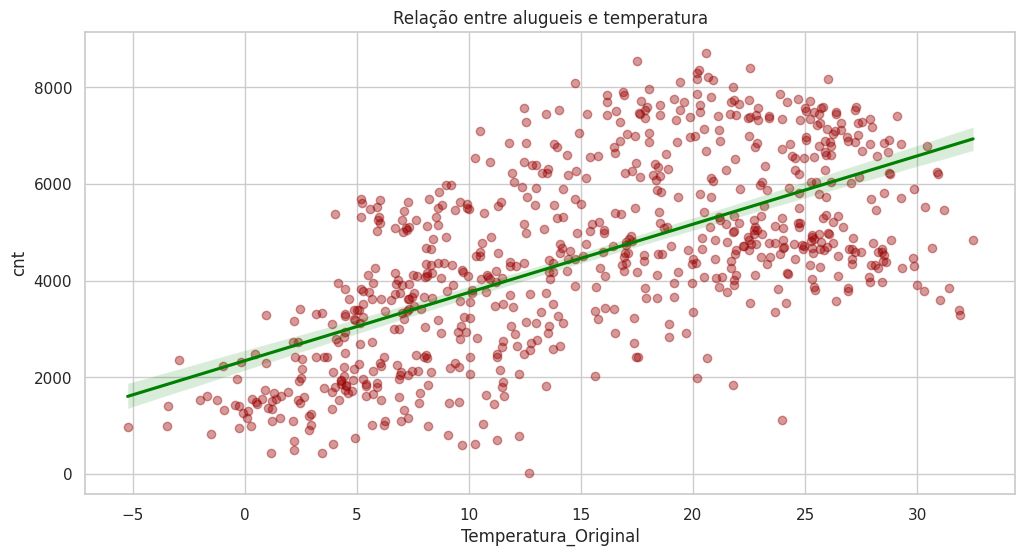

In [49]:
plt.figure(figsize=(12, 6))
sns.regplot(x=df2['Temperatura_Original'], y=df['cnt'], data=df, scatter_kws={'alpha':0.4}, line_kws={'color':'green'})
plt.title('Relação entre alugueis e temperatura')
plt.show()

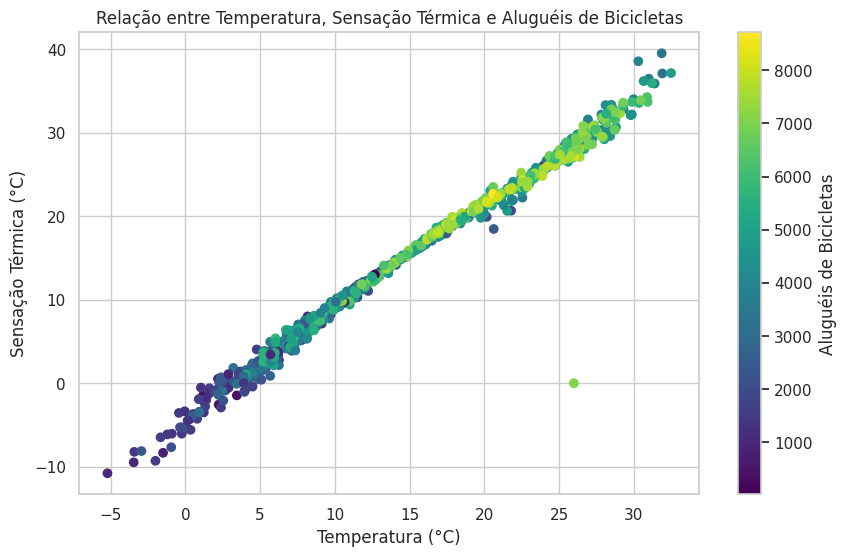

In [50]:
# Gráfico relação de temperatura, sensação térmica e alugueis.

plt.figure(figsize=(10, 6))
plt.scatter(df2['Temperatura_Original'], df2['aTemperatura_Original'], c=df2['cnt'], cmap='viridis')
plt.colorbar(label='Aluguéis de Bicicletas')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Sensação Térmica (°C)')
plt.title('Relação entre Temperatura, Sensação Térmica e Aluguéis de Bicicletas')
plt.show()